In [3]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# NaCi Crystal Orientation

In [22]:
columns = ["2theta", "intensity"]

In [21]:
naci_sample_1 = pd.read_csv('data/NaCi_sample_1.tsv', sep='\t', skiprows=1, encoding='unicode_escape')
naci_sample_2 = pd.read_csv('data/NaCi_sample_2.tsv', sep='\t', skiprows=1, encoding='unicode_escape')
naci_sample_3 = pd.read_csv('data/NaCi_sample_3.tsv', sep='\t', skiprows=1, encoding='unicode_escape')

In [23]:
samples = [naci_sample_1, naci_sample_2, naci_sample_3]

Text(0.5, 23.52222222222222, '2 Theta (degrees)')

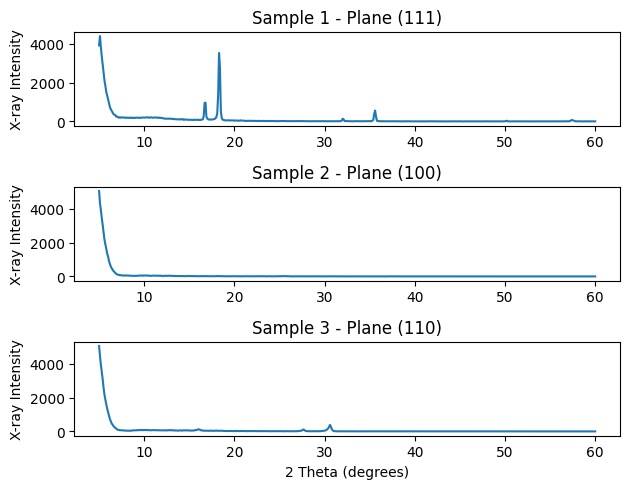

In [24]:
fig, axs = plt.subplots(nrows=len(samples))
titles = ["Plane (111)", "Plane (100)", "Plane (110)"]

for index, sample in enumerate(samples):
    sample.columns = columns
    axs[index].plot(
        sample["2theta"],
        sample["intensity"]
    )
    axs[index].set_title(f'Sample {index + 1} - {titles[index]}')
    axs[index].set_ylabel('X-ray Intensity')

plt.tight_layout()
plt.xlabel('2 Theta (degrees)')

Determining diffraction peak and uncertainty

In [25]:
def gauss(x, A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def fit_gaussian(x, y, p0):
    popt, pcov = curve_fit(gauss, x, y, p0)
    return (popt[1], popt[2])

In [26]:
a = 5.64e-10

def print_out_data(mu, sigma, n, wavelength):
    print(
        f'{mu:.2f}',
        f'{sigma:.2f}',
        f'{mu / 2:.2f}',
        f'{sigma / 2:.2f}',
        f'{2 * a / (n * wavelength) * np.sin(np.radians(mu / 2)):.2f}',
        f'{sigma / 2 * 2 * a / (n * wavelength) * np.cos(np.radians(mu / 2)):.2f}'
    )

16.75 -0.09 8.37 -0.05 1.18 -0.37


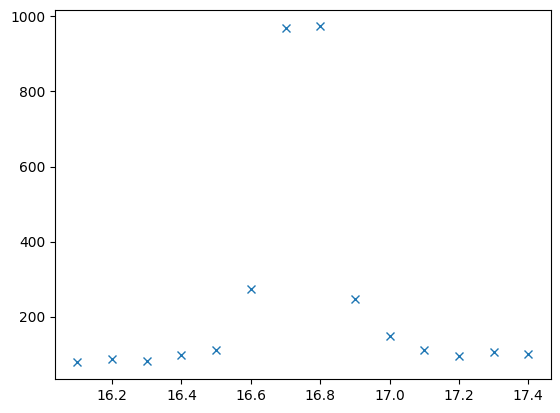

In [27]:
order_1_k_beta_data = naci_sample_1[(naci_sample_1['2theta'] > 16) & (naci_sample_1['2theta'] < 17.5)]
plt.plot(
    order_1_k_beta_data['2theta'],
    order_1_k_beta_data['intensity'],
    'x'
)
mu, sigma = fit_gaussian(
    order_1_k_beta_data['2theta'],
    order_1_k_beta_data['intensity'],
    [1000, 16.7, 1]
)

print_out_data(
    mu, sigma, 1, 1.39e-10
)
order_1_k_beta_mu = mu

18.33 0.09 9.16 0.05 1.17 0.33


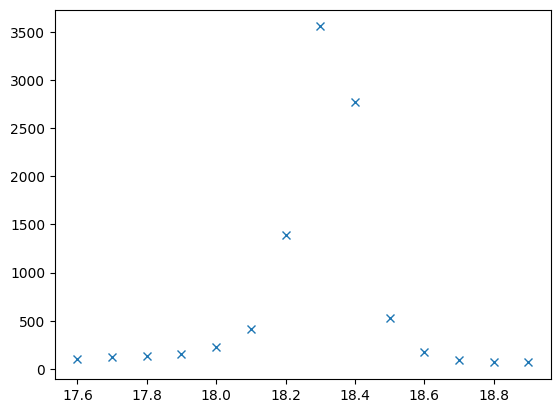

In [28]:
order_1_k_alpha_data = naci_sample_1[(naci_sample_1['2theta'] > 17.5) & (naci_sample_1['2theta'] < 19)]
plt.plot(
    order_1_k_alpha_data['2theta'],
    order_1_k_alpha_data['intensity'],
    'x'
)
mu, sigma = fit_gaussian(
    order_1_k_alpha_data['2theta'],
    order_1_k_alpha_data['intensity'],
    [1000, 18, 1]
)

print_out_data(
    mu, sigma, 1, 1.54e-10
)
order_1_k_alpha_mu = mu

In [38]:
2 * 5.64e-10 / (1.54e-10 - 1.39e-10) * (np.sin(order_1_k_alpha_mu / 2) - np.sin(order_1_k_beta_mu / 2)) 

-45.80726721335711

In [42]:
order_1_k_alpha_mu / 2

9.16347154246712

In [41]:
order_1_k_beta_mu / 2

8.374659758881908

32.04 -0.09 16.02 -0.05 1.12 -0.18


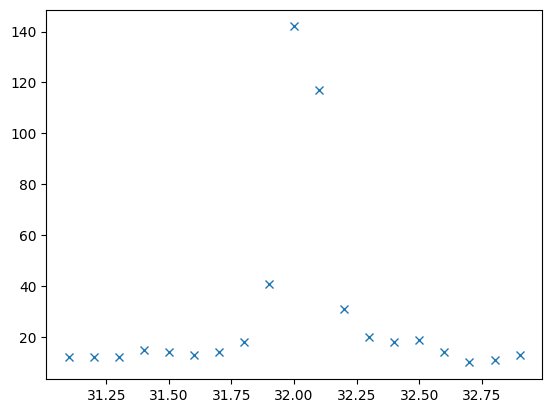

In [10]:
order_2_k_beta_data = naci_sample_1[(naci_sample_1['2theta'] > 31) & (naci_sample_1['2theta'] < 33)]
plt.plot(
    order_2_k_beta_data['2theta'],
    order_2_k_beta_data['intensity'],
    'x'
)
mu, sigma = fit_gaussian(
    order_2_k_beta_data['2theta'],
    order_2_k_beta_data['intensity'],
    [1000, 32, 1]
)

print_out_data(
    mu, sigma, 2, 1.39e-10
)

35.58 -0.09 17.79 -0.05 1.12 -0.16


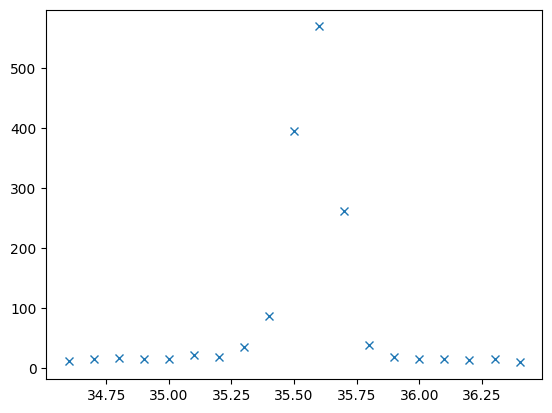

In [11]:
order_2_k_alpha_data = naci_sample_1[(naci_sample_1['2theta'] > 34.5) & (naci_sample_1['2theta'] < 36.5)]
plt.plot(
    order_2_k_alpha_data['2theta'],
    order_2_k_alpha_data['intensity'],
    'x'
)
mu, sigma = fit_gaussian(
    order_2_k_alpha_data['2theta'],
    order_2_k_alpha_data['intensity'],
    [1000, 35, 1]
)

print_out_data(
    mu, sigma, 2, 1.54e-10
)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

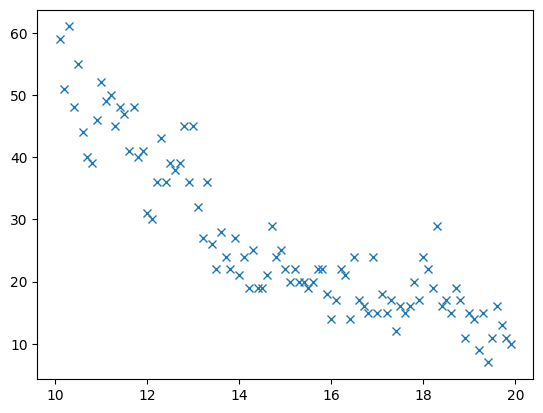

In [13]:
data = naci_sample_2[(naci_sample_2['2theta'] > 10) & (naci_sample_2['2theta'] < 20)]
plt.plot(
    data['2theta'],
    data['intensity'],
    'x'
)
mu, sigma = fit_gaussian(
    data['2theta'],
    data['intensity'],
    [1000, 10, 1]
)

print_out_data(
    mu, sigma, 2, 1.54e-10
)

12.69 1.49 6.34 0.75 0.90 6.01


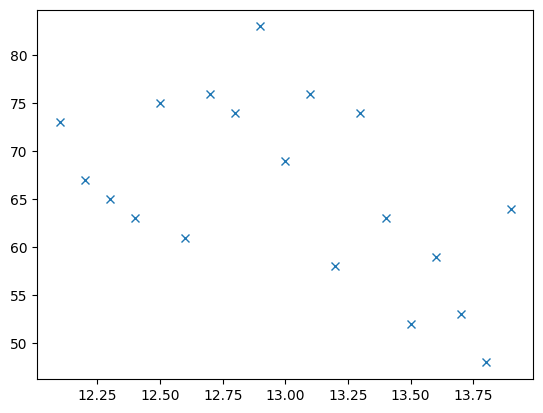

In [27]:
data = naci_sample_3[(naci_sample_3['2theta'] > 12) & (naci_sample_3['2theta'] < 14)]
plt.plot(
    data['2theta'],
    data['intensity'],
    'x'
)
mu, sigma = fit_gaussian(
    data['2theta'],
    data['intensity'],
    [1000, 16, 1]
)

print_out_data(
    mu, sigma, 1, 1.39e-10
)

Theoretical Value for Diffraction peak

In [20]:
columns = ["Order", "Wavelength", "Plane", "Angle of Incidence"]

rows = [] 
a = 5.64e-10
for (h, k, l) in [(1, 0, 0), (1, 1, 0), (1, 1, 1)]:
    for n in [1, 2]:
        for wavelength in [1.54e-10, 1.39e-10]:
            rows.append(
                {
                    "Order": n,
                    "Wavelength": f"{wavelength * 1e10:.2f}",
                    "Plane": f"({h}{k}{l})",
                    "Angle of Incidence": f"{np.degrees(np.arcsin(n * wavelength / 2 * np.sqrt(h ** 2 + k ** 2 + l ** 2) / a)):.2f}"
                }
            )
            
diffraction_peak_theoretical = pd.DataFrame(columns = columns, data=rows)
print(
    diffraction_peak_theoretical.to_latex(index=False, column_format='|c|c|c|c|', bold_rows=True)    
)


\begin{tabular}{|c|c|c|c|}
\toprule
Order & Wavelength & Plane & Angle of Incidence \\
\midrule
1 & 1.54 & (100) & 7.85 \\
1 & 1.39 & (100) & 7.08 \\
2 & 1.54 & (100) & 15.85 \\
2 & 1.39 & (100) & 14.27 \\
1 & 1.54 & (110) & 11.13 \\
1 & 1.39 & (110) & 10.04 \\
2 & 1.54 & (110) & 22.72 \\
2 & 1.39 & (110) & 20.40 \\
1 & 1.54 & (111) & 13.68 \\
1 & 1.39 & (111) & 12.32 \\
2 & 1.54 & (111) & 28.23 \\
2 & 1.39 & (111) & 25.27 \\
\bottomrule
\end{tabular}


Lattice Spacing

In [29]:
# Sample 1
lattice_computing_data = [
    (8.37, 0.05, 1, 1.39e-10),
    (9.16, 0.05, 1, 1.54e-10),
    (16.02, 0.05, 2, 1.39e-10),
    (17.79, 0.05, 2, 1.54e-10),
]

In [30]:
 def lattice_spacing_111(theta, delta_theta, n, wavelength):
    a = np.sqrt(3) * n * wavelength / (2 * np.sin(np.radians(theta)))
    delta_a = delta_theta * np.sqrt(3) * n * wavelength / 2 * - np.cos(np.radians(theta)) / (np.sin(np.radians(theta)) ** 2) 
    return (a, delta_a)

In [1]:
for (theta, delta_theta, n, wavelength) in lattice_computing_data:
    a, delta_a = lattice_spacing_111(theta, delta_theta, n, wavelength)
    print(
        f'{a:.2E}, {delta_a:.2E}'
    )

NameError: name 'lattice_computing_data' is not defined

# Powder Diffraction

In [10]:
columns = ['theta2', 'intensity']
naci_powder = pd.read_csv('data/NaCi_powder.tsv', sep='\t', skiprows=1, encoding='unicode_escape')
naci_powder.columns = columns

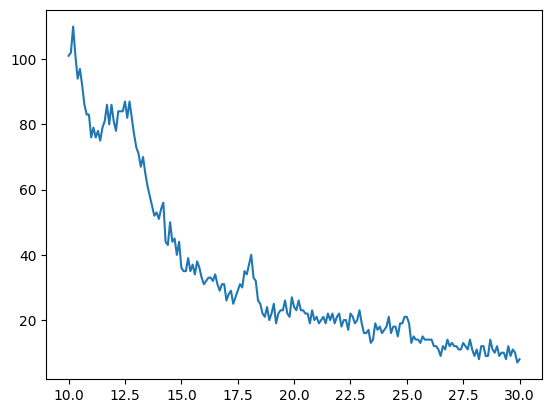

In [11]:
plt.plot(
    naci_powder.theta2, 
    naci_powder.intensity
)